In [101]:
import copy
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
plt.rcParams['text.usetex'] = True
from tqdm import tqdm
import skimage

In [102]:
img = mpimg.imread('images/test1.jpg')

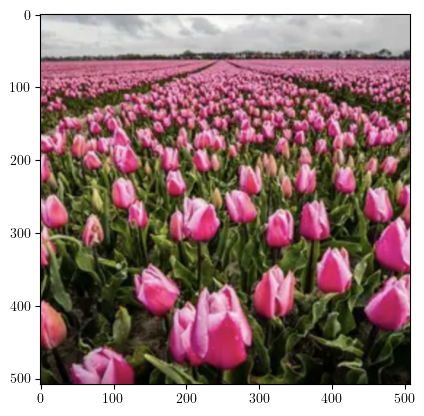

In [103]:
fig, ax = plt.subplots()
ax = plt.imshow(img)
fig_1 = plt.gcf()
fig_1.savefig('plots/fig_1.pdf', format='pdf', dpi=500)
plt.show()

In [104]:
def greyscale(img):
    return np.dot(img, [0.299, 0.587, 0.114])

In [105]:
img_grey = greyscale(img)

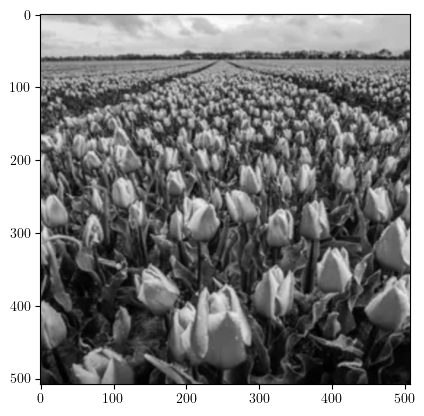

In [106]:
fig, ax = plt.subplots()
ax = plt.imshow(img_grey, cmap='gray', vmin=0, vmax=255)
fig_2 = plt.gcf()
fig_2.savefig('plots/fig_2.pdf', format='pdf', dpi=500)
plt.show()

In [107]:
def LoG(x, y, sigma):
    return -1/(np.pi*sigma**4)*(1-(x**2+y**2)/(2*sigma**2))*np.exp(-(x**2+y**2)/(2*sigma**2))

In [109]:
def LoG_discrete(sigma):
    bound = int(3*np.ceil(sigma))
    xx, yy = np.meshgrid(np.linspace(-bound, bound, 2*bound+1),np.linspace(-bound, bound, 2*bound+1))
    return np.vectorize(LoG)(xx, yy, sigma)*sigma**2

In [110]:
def convolution2d(image, filter):
    m, n = filter.shape
    y, x = image.shape
    y = y - m + 1
    x = x - m + 1
    new_image = np.zeros((y,x))
    for i in range(y):
        for j in range(x):
            new_image[i][j] = np.sum(image[i:i+m, j:j+m]*filter)
    new_image = np.pad(new_image,((int((m-1)/2),int((m-1)/2)),(int((m-1)/2),int((m-1)/2))),'constant')
    return new_image

In [111]:
def convolveLoG(img, sigma=1):
    images_LoG = []
    for i in tqdm(range(0,6)):
        scaler = np.power(2,i)
        image_LoG = convolution2d(img, LoG_discrete(sigma*scaler))
        image_LoG = np.square(image_LoG)
        images_LoG.append(image_LoG)
    return np.array([i for i in images_LoG])

In [112]:
all_convs = convolveLoG(img_grey)

100%|██████████| 6/6 [00:07<00:00,  1.22s/it]


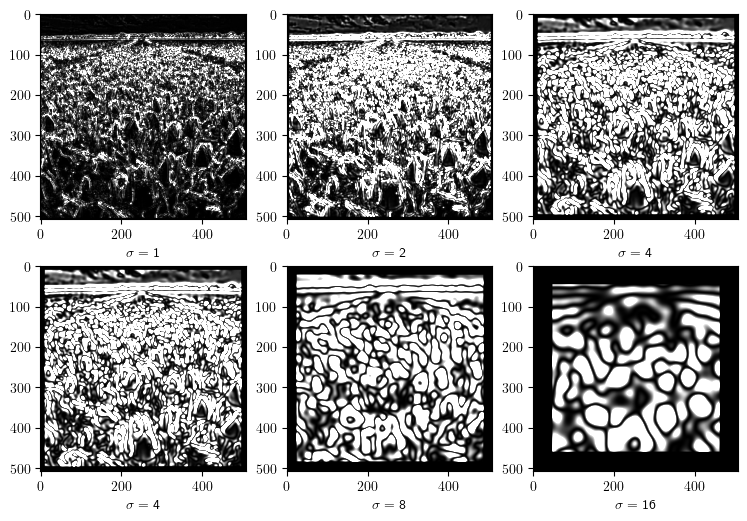

In [113]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
for i in range(0,3):
    ax[0,i].imshow(all_convs[i], cmap='gray', vmin=0, vmax=255)
    ax[0,i].set_xlabel(f'$\sigma =$ {np.power(2,i)}')
for i in range(0,3):
    ax[1,i].imshow(all_convs[i+2], cmap='gray', vmin=0, vmax=255)
    ax[1,i].set_xlabel(f'$\sigma =$ {np.power(2,i+2)}')
fig_3 = plt.gcf()
fig_3.savefig('plots/fig_3.pdf', format='pdf', dpi=500)
plt.show()

In [114]:
all_convs_threshold = copy.deepcopy(all_convs)
for conv in all_convs_threshold:
    conv[conv < 3000] = 0

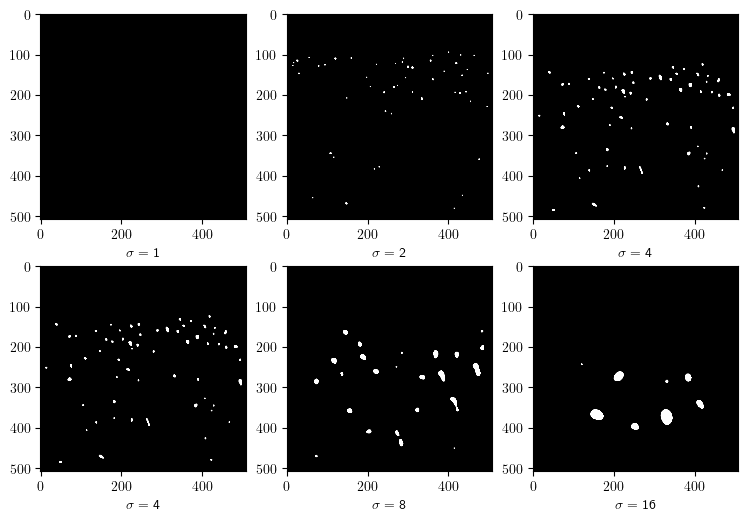

In [116]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))
for i in range(0,3):
    ax[0,i].imshow(all_convs_threshold[i], cmap='gray', vmin=0, vmax=255)
    ax[0,i].set_xlabel(f'$\sigma =$ {np.power(2,i)}')
for i in range(0,3):
    ax[1,i].imshow(all_convs_threshold[i+2], cmap='gray', vmin=0, vmax=255)
    ax[1,i].set_xlabel(f'$\sigma =$ {np.power(2,i+2)}')
fig_4 = plt.gcf()
fig_4.savefig('plots/fig_4.pdf', format='pdf', dpi=500)
plt.show()

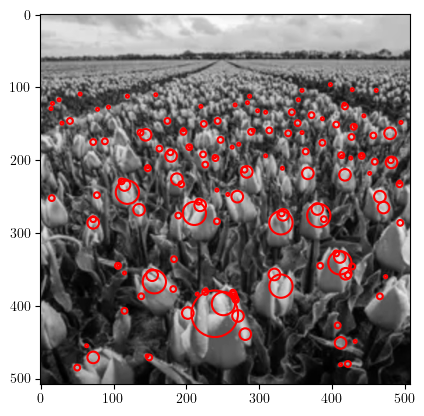

In [117]:
fig, ax = plt.subplots()
ax = plt.imshow(img_grey, cmap='gray', vmin=0, vmax=255).axes
for i, conv in enumerate(all_convs_threshold):
    coordinates = skimage.feature.peak_local_max(conv, min_distance=1)
    for blob in coordinates:
        y,x = blob
        c = patches.Circle((x, y), 2**i, color='red', linewidth=1.5, fill=False)
        ax.add_patch(c)
fig_5 = plt.gcf()
fig_5.savefig('plots/fig_5.pdf', format='pdf', dpi=500)
plt.show()